#Data Preparation

## Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

from google.colab import drive
drive.mount('/content/drive')

path1 = "/content/drive/MyDrive/DS/aggregate_median_jams_Kota Bandung_fixed.csv"

df = pd.read_csv(path1)
df.head()

matplotlib: 3.5.3
Mounted at /content/drive


,Unnamed: 0,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,0,2022-07-06 00:00:00.000,32.73,KOTA BANDUNG,Jenderal Ahmad Yani,4,428.0,201.5,6.29,14,33471439,2022-07-06,4.0,"MULTILINESTRING ((107.622869 -6.919558, 107.62..."
1,1,2022-07-06 00:00:00.000,32.73,KOTA BANDUNG,Cibaduyut Raya,5,24.0,-1.0,0.00,60,33471432,2022-07-06,5.0,"MULTILINESTRING ((107.59526 -6.947213, 107.595..."
2,2,2022-07-06 00:00:00.000,32.73,KOTA BANDUNG,Cidurian Selatan,2,531.0,101.5,9.07,2,33471433,2022-07-06,2.0,"LINESTRING (107.652971 -6.940132, 107.653181 -..."
3,3,2022-07-06 00:00:00.000,32.73,KOTA BANDUNG,Dr Setiabudi,1,919.0,61.0,20.42,2,33471434,2022-07-06,1.0,"LINESTRING (107.593922 -6.866493, 107.5939 -6...."
4,4,2022-07-06 00:00:00.000,32.73,KOTA BANDUNG,Gerbang Tol Gede Bage,5,318.5,-1.0,0.00,120,33471435,2022-07-06,5.0,"MULTILINESTRING ((107.690448 -6.961397, 107.69..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301995 entries, 0 to 301994
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 301995 non-null  int64  
 1   time                       301995 non-null  object 
 2   kemendagri_kabupaten_kode  301995 non-null  float64
 3   kemendagri_kabupaten_nama  301995 non-null  object 
 4   street                     299552 non-null  object 
 5   level                      301995 non-null  int64  
 6   median_length              301995 non-null  float64
 7   median_delay               301995 non-null  float64
 8   median_speed_kmh           301995 non-null  float64
 9   total_records              301995 non-null  int64  
 10  id                         301995 non-null  int64  
 11  date                       301995 non-null  object 
 12  median_level               301995 non-null  float64
 13  geometry                   30

##Feature Engineering & Data Cleansing

In [3]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')

df['day'] = df['time'].dt.day_name()

df['hours'] = df['time'].dt.hour

df.head()

,Unnamed: 0,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,day,hours
0,0,2022-07-06,32.73,KOTA BANDUNG,Jenderal Ahmad Yani,4,428.0,201.5,6.29,14,33471439,2022-07-06,4.0,"MULTILINESTRING ((107.622869 -6.919558, 107.62...",Wednesday,0
1,1,2022-07-06,32.73,KOTA BANDUNG,Cibaduyut Raya,5,24.0,-1.0,0.00,60,33471432,2022-07-06,5.0,"MULTILINESTRING ((107.59526 -6.947213, 107.595...",Wednesday,0
2,2,2022-07-06,32.73,KOTA BANDUNG,Cidurian Selatan,2,531.0,101.5,9.07,2,33471433,2022-07-06,2.0,"LINESTRING (107.652971 -6.940132, 107.653181 -...",Wednesday,0
3,3,2022-07-06,32.73,KOTA BANDUNG,Dr Setiabudi,1,919.0,61.0,20.42,2,33471434,2022-07-06,1.0,"LINESTRING (107.593922 -6.866493, 107.5939 -6....",Wednesday,0
4,4,2022-07-06,32.73,KOTA BANDUNG,Gerbang Tol Gede Bage,5,318.5,-1.0,0.00,120,33471435,2022-07-06,5.0,"MULTILINESTRING ((107.690448 -6.961397, 107.69...",Wednesday,0


In [4]:
df.isnull().sum()

Unnamed: 0                      0
time                            0
kemendagri_kabupaten_kode       0
kemendagri_kabupaten_nama       0
street                       2443
level                           0
median_length                   0
median_delay                    0
median_speed_kmh                0
total_records                   0
id                              0
date                            0
median_level                    0
geometry                        0
day                             0
hours                           0
dtype: int64

In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
street,2443,0.00809
Unnamed: 0,0,0.00000
time,0,0.00000
kemendagri_kabupaten_kode,0,0.00000
kemendagri_kabupaten_nama,0,0.00000
level,0,0.00000
median_length,0,0.00000
median_delay,0,0.00000
median_speed_kmh,0,0.00000
total_records,0,0.00000


In [6]:
df[df.duplicated()]

,Unnamed: 0,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,day,hours


In [7]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299552 entries, 0 to 301994
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Unnamed: 0                 299552 non-null  int64         
 1   time                       299552 non-null  datetime64[ns]
 2   kemendagri_kabupaten_kode  299552 non-null  float64       
 3   kemendagri_kabupaten_nama  299552 non-null  object        
 4   street                     299552 non-null  object        
 5   level                      299552 non-null  int64         
 6   median_length              299552 non-null  float64       
 7   median_delay               299552 non-null  float64       
 8   median_speed_kmh           299552 non-null  float64       
 9   total_records              299552 non-null  int64         
 10  id                         299552 non-null  int64         
 11  date                       299552 non-null  object  

In [8]:
df = df.drop(['Unnamed: 0','kemendagri_kabupaten_kode','kemendagri_kabupaten_nama', 'id', 'date',
            'geometry'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299552 entries, 0 to 301994
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   time              299552 non-null  datetime64[ns]
 1   street            299552 non-null  object        
 2   level             299552 non-null  int64         
 3   median_length     299552 non-null  float64       
 4   median_delay      299552 non-null  float64       
 5   median_speed_kmh  299552 non-null  float64       
 6   total_records     299552 non-null  int64         
 7   median_level      299552 non-null  float64       
 8   day               299552 non-null  object        
 9   hours             299552 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 25.1+ MB


In [9]:
numcol = df.select_dtypes(include=[np.number], exclude=[np.bool]).columns
catcol = df.select_dtypes(exclude=[np.number]).columns

<ipython-input-9-f169de1f9a2c>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numcol = df.select_dtypes(include=[np.number], exclude=[np.bool]).columns


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
level,299552.0,2.598514,0.989523,1.0,2.00,3.00,3.00,5.00
median_length,299552.0,726.947522,471.643013,9.0,391.00,630.00,957.00,13201.00
median_delay,299552.0,132.806135,111.117531,-1.0,75.50,99.00,145.50,4368.50
median_speed_kmh,299552.0,12.312004,6.696982,0.0,7.06,11.73,16.57,60.75
total_records,299552.0,20.396793,28.125062,1.0,4.00,10.00,25.00,331.00
median_level,299552.0,2.598514,0.989523,1.0,2.00,3.00,3.00,5.00
hours,299552.0,13.903987,4.363846,0.0,11.00,14.00,17.00,23.00


In [11]:
change_object = ['level', 'hours']
for i in change_object:
    df[i] = df[i].astype(object)

In [12]:
df.describe(exclude=[np.number]).T

<ipython-input-12-919c2020ed16>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude=[np.number]).T


,count,unique,top,freq,first,last
time,299552,1419,2022-07-16 14:00:00,626,2022-07-06,2022-09-06
street,299552,1161,N11 Soekarno-Hatta,4238,NaT,NaT
level,299552.0,5.0,2.0,102635.0,NaT,NaT
day,299552,7,Friday,50804,NaT,NaT
hours,299552.0,24.0,17.0,26185.0,NaT,NaT


In [13]:
df['street'].nunique()

1161

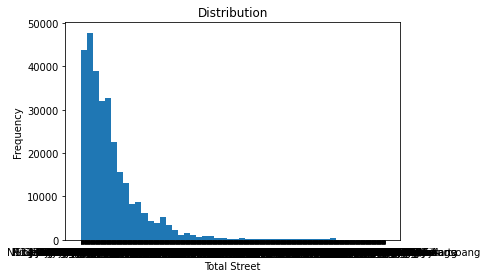

In [14]:
import matplotlib.pyplot as plt

# Create histogram
plt.hist(df['street'], bins=50)

# Set axis labels and title
plt.xlabel('Total Street')
plt.ylabel('Frequency')
plt.title('Distribution')

# Show plot
plt.show()

In [15]:
df_street = df.groupby('street', as_index=False)['level'].count()
df_street.head()

,street,level
0,Abadi 1,1
1,Abadi Raya,5
2,Abadi Regency,1
3,Abdul Halim,3
4,Abdul Rahman Saleh,1926


In [16]:
df_strt = df_street.sort_values(by='level', ascending=False)
df_strt

,street,level
711,N11 Soekarno-Hatta,4238
400,Ir Haji Juanda,3779
150,Cibaduyut Raya,3614
516,Jenderal AH Nasution,3570
527,KH Wahid Hasyim,3464
...,...,...
552,Kasturi 1,1
933,Satrugna,1
932,Satria Raya 3,1
930,Satria Kulon 4,1


In [17]:
df_strt.describe()

,level
count,1161.000000
mean,258.012059
std,617.464940
min,1.000000
25%,2.000000
50%,9.000000
75%,129.000000
max,4238.000000


In [18]:
top10streets = df['street'].value_counts().nlargest(10).index
df1 = df[df['street'].isin(top10streets)]
df1.head()

,time,street,level,median_length,median_delay,median_speed_kmh,total_records,median_level,day,hours
0,2022-07-06,Jenderal Ahmad Yani,4,428.0,201.5,6.290,14,4.0,Wednesday,0
1,2022-07-06,Cibaduyut Raya,5,24.0,-1.0,0.000,60,5.0,Wednesday,0
5,2022-07-06,Ir Haji Juanda,2,1234.0,105.5,17.535,12,2.0,Wednesday,0
6,2022-07-06,Ir Haji Juanda,3,786.0,118.5,14.365,8,3.0,Wednesday,0
7,2022-07-06,Jenderal Ahmad Yani,3,863.0,215.0,9.880,1,3.0,Wednesday,0


In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

df1['day_of_week'] = df1['time'].dt.dayofweek

df1['hour_of_day'] = df1['time'].dt.hour

df1.head()

<ipython-input-19-3f9916242471>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['day_of_week'] = df1['time'].dt.dayofweek
<ipython-input-19-3f9916242471>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['hour_of_day'] = df1['time'].dt.hour


,time,street,level,median_length,median_delay,median_speed_kmh,total_records,median_level,day,hours,day_of_week,hour_of_day
0,2022-07-06,Jenderal Ahmad Yani,4,428.0,201.5,6.290,14,4.0,Wednesday,0,2,0
1,2022-07-06,Cibaduyut Raya,5,24.0,-1.0,0.000,60,5.0,Wednesday,0,2,0
5,2022-07-06,Ir Haji Juanda,2,1234.0,105.5,17.535,12,2.0,Wednesday,0,2,0
6,2022-07-06,Ir Haji Juanda,3,786.0,118.5,14.365,8,3.0,Wednesday,0,2,0
7,2022-07-06,Jenderal Ahmad Yani,3,863.0,215.0,9.880,1,3.0,Wednesday,0,2,0


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35162 entries, 0 to 301994
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              35162 non-null  datetime64[ns]
 1   street            35162 non-null  object        
 2   level             35162 non-null  object        
 3   median_length     35162 non-null  float64       
 4   median_delay      35162 non-null  float64       
 5   median_speed_kmh  35162 non-null  float64       
 6   total_records     35162 non-null  int64         
 7   median_level      35162 non-null  float64       
 8   day               35162 non-null  object        
 9   hours             35162 non-null  object        
 10  day_of_week       35162 non-null  int64         
 11  hour_of_day       35162 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 3.5+ MB


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
labelencoder = LabelEncoder()
df1['street_category'] = labelencoder.fit_transform(df1['street'])
df1['level_category'] = labelencoder.fit_transform(df1['level'])

<ipython-input-21-285335333813>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['street_category'] = labelencoder.fit_transform(df1['street'])
<ipython-input-21-285335333813>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['level_category'] = labelencoder.fit_transform(df1['level'])


In [22]:
df1

,time,street,level,median_length,median_delay,median_speed_kmh,total_records,median_level,day,hours,day_of_week,hour_of_day,street_category,level_category
0,2022-07-06 00:00:00,Jenderal Ahmad Yani,4,428.0,201.5,6.290,14,4.0,Wednesday,0,2,0,3,3
1,2022-07-06 00:00:00,Cibaduyut Raya,5,24.0,-1.0,0.000,60,5.0,Wednesday,0,2,0,0,4
5,2022-07-06 00:00:00,Ir Haji Juanda,2,1234.0,105.5,17.535,12,2.0,Wednesday,0,2,0,1,1
6,2022-07-06 00:00:00,Ir Haji Juanda,3,786.0,118.5,14.365,8,3.0,Wednesday,0,2,0,1,2
7,2022-07-06 00:00:00,Jenderal Ahmad Yani,3,863.0,215.0,9.880,1,3.0,Wednesday,0,2,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301974,2022-09-04 23:00:00,Jenderal Ibrahim Adjie,2,1614.0,96.5,23.325,12,2.0,Sunday,23,6,23,4,1
301976,2022-09-04 23:00:00,N11 Soekarno-Hatta,2,1481.0,111.0,24.800,1,2.0,Sunday,23,6,23,7,1
301978,2022-09-04 23:00:00,N11 Soekarno-Hatta,1,2108.0,121.0,28.360,1,1.0,Sunday,23,6,23,7,0
301982,2022-09-06 00:00:00,KH Wahid Hasyim,5,25.0,-1.0,0.000,120,5.0,Tuesday,0,1,0,5,4


In [23]:
conditions = [
    (df1['hours'] >= 0) & (df1['hours'] < 5),
    (df1['hours'] >= 5) & (df1['hours'] < 11),
    (df1['hours'] >= 11) & (df1['hours'] < 17),
    (df1['hours'] >= 17) & (df1['hours'] <= 24)
]
values = ['Midnight', 'Morning', 'Afternoon','Night']
df1['day_part'] = np.select(conditions, values)

df1['hour_of_day'] = pd.factorize(df1['day_part'])[0]

<ipython-input-23-782b8c20220e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['day_part'] = np.select(conditions, values)
<ipython-input-23-782b8c20220e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['hour_of_day'] = pd.factorize(df1['day_part'])[0]


In [55]:
df1.to_csv("Data_Final.csv", index=False)

In [24]:
df1.head()

,time,street,level,median_length,median_delay,median_speed_kmh,total_records,median_level,day,hours,day_of_week,hour_of_day,street_category,level_category,day_part
0,2022-07-06,Jenderal Ahmad Yani,4,428.0,201.5,6.290,14,4.0,Wednesday,0,2,0,3,3,Midnight
1,2022-07-06,Cibaduyut Raya,5,24.0,-1.0,0.000,60,5.0,Wednesday,0,2,0,0,4,Midnight
5,2022-07-06,Ir Haji Juanda,2,1234.0,105.5,17.535,12,2.0,Wednesday,0,2,0,1,1,Midnight
6,2022-07-06,Ir Haji Juanda,3,786.0,118.5,14.365,8,3.0,Wednesday,0,2,0,1,2,Midnight
7,2022-07-06,Jenderal Ahmad Yani,3,863.0,215.0,9.880,1,3.0,Wednesday,0,2,0,3,2,Midnight


In [25]:
df1.nunique()

time                1419
street                10
level                  5
median_length       3283
median_delay        1341
median_speed_kmh    6730
total_records        281
median_level           5
day                    7
hours                 24
day_of_week            7
hour_of_day            4
street_category       10
level_category         5
day_part               4
dtype: int64

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35162 entries, 0 to 301994
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              35162 non-null  datetime64[ns]
 1   street            35162 non-null  object        
 2   level             35162 non-null  object        
 3   median_length     35162 non-null  float64       
 4   median_delay      35162 non-null  float64       
 5   median_speed_kmh  35162 non-null  float64       
 6   total_records     35162 non-null  int64         
 7   median_level      35162 non-null  float64       
 8   day               35162 non-null  object        
 9   hours             35162 non-null  object        
 10  day_of_week       35162 non-null  int64         
 11  hour_of_day       35162 non-null  int64         
 12  street_category   35162 non-null  int64         
 13  level_category    35162 non-null  int64         
 14  day_part          351

# Exploratory Data Analysis

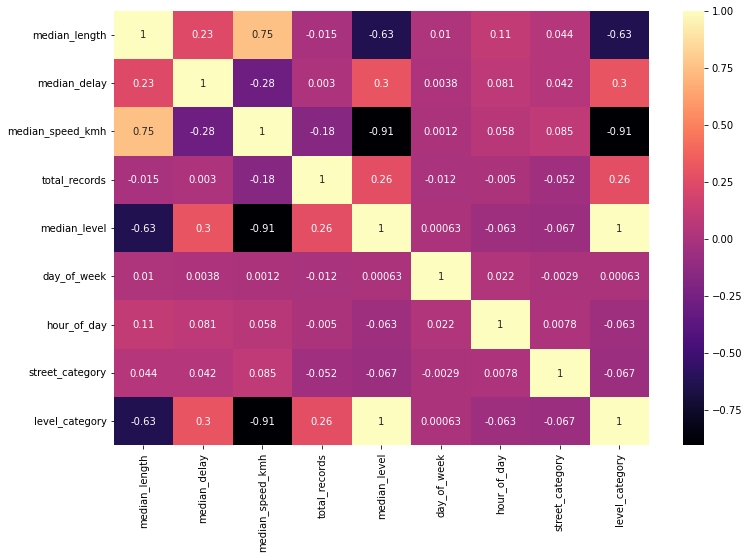

<Figure size 432x288 with 0 Axes>

In [57]:
numerical_cols = ['median_length', 'median_delay', 'median_speed_kmh', 'total_records', 'median_level', 'day_of_week', 'hour_of_day', 'street_category', 'level_category']
df1_numeric = df1[numerical_cols]

corr = df1_numeric.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="magma")
plt.show()
plt.savefig("Data_Corr.png")

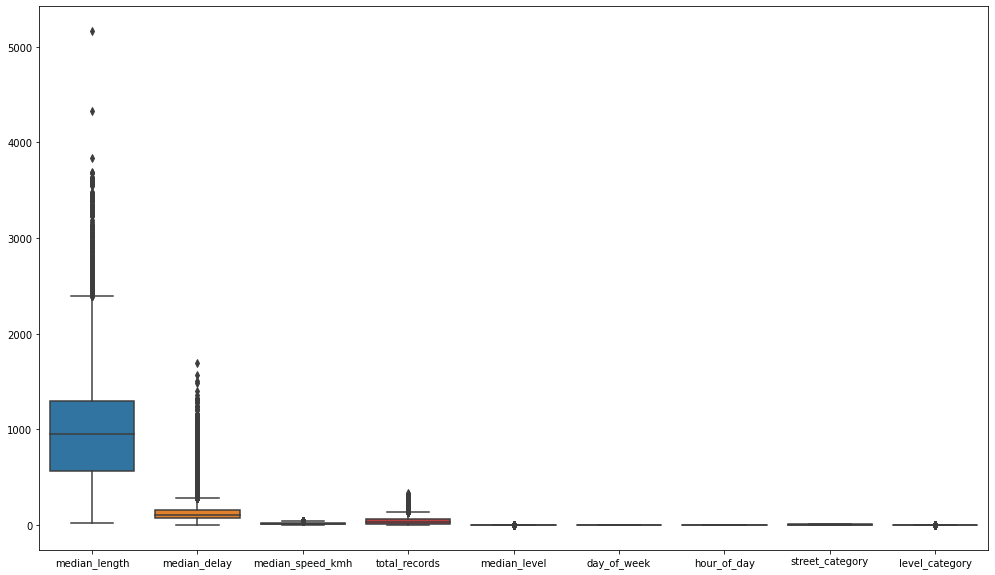

In [28]:
# Boxplot for Each Numerical Feature
plt.figure(figsize=(17,10))
sns.boxplot(data=df1.select_dtypes(include='number'))
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103

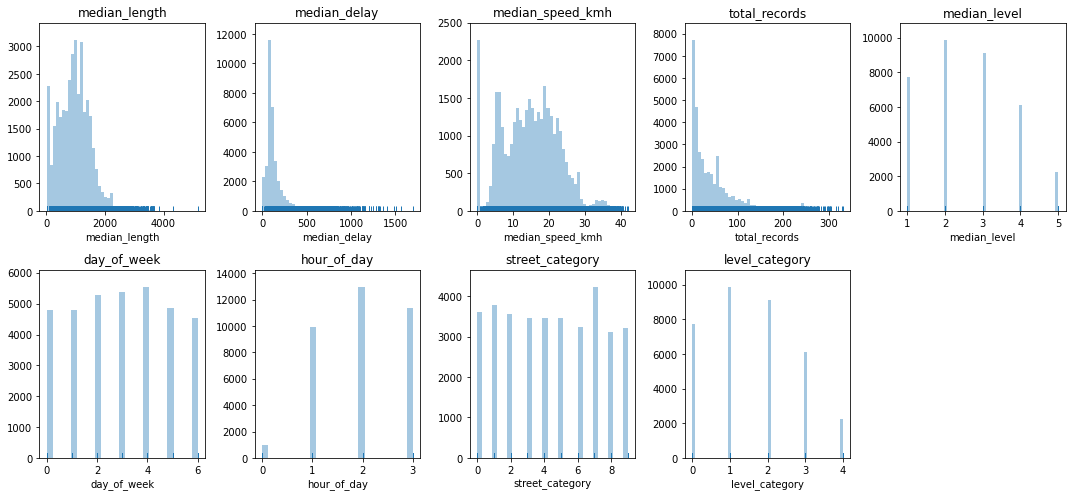

In [29]:
# Distplot for Each Numerical Feature
num_cols = df1.select_dtypes(include='number').columns
plt.figure(figsize=(15,10))
for i in range(len(num_cols)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df1[num_cols[i]], kde=False, rug=True)
    plt.title(num_cols[i])
plt.tight_layout()
plt.show()

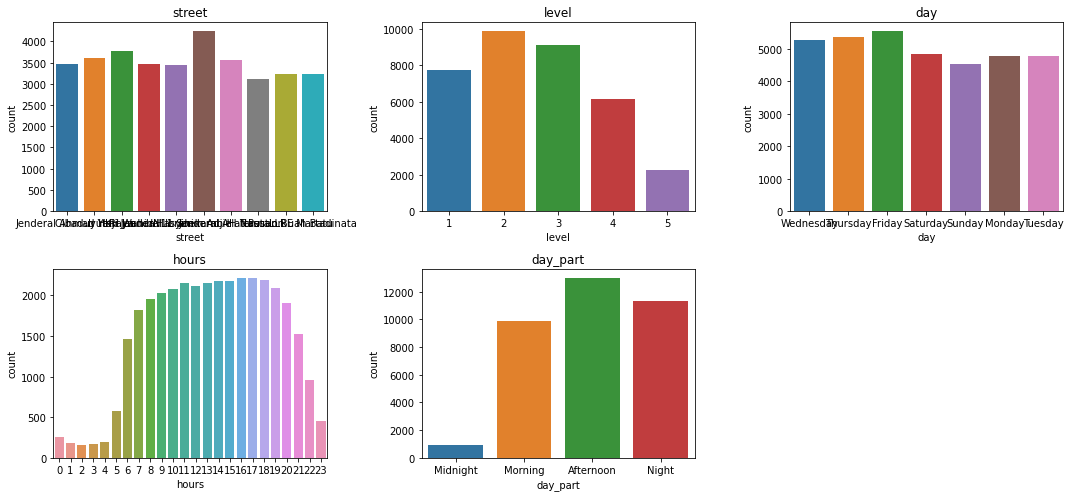

In [30]:
# Countplot for Each Categorical Feature
cat_cols = df1.select_dtypes(include='object').columns
plt.figure(figsize=(15,10))
for i in range(len(cat_cols)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=cat_cols[i], data=df1)
    plt.title(cat_cols[i])
plt.tight_layout()
plt.show()

#Modelling

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error



In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35162 entries, 0 to 301994
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              35162 non-null  datetime64[ns]
 1   street            35162 non-null  object        
 2   level             35162 non-null  object        
 3   median_length     35162 non-null  float64       
 4   median_delay      35162 non-null  float64       
 5   median_speed_kmh  35162 non-null  float64       
 6   total_records     35162 non-null  int64         
 7   median_level      35162 non-null  float64       
 8   day               35162 non-null  object        
 9   hours             35162 non-null  object        
 10  day_of_week       35162 non-null  int64         
 11  hour_of_day       35162 non-null  int64         
 12  street_category   35162 non-null  int64         
 13  level_category    35162 non-null  int64         
 14  day_part          351

In [33]:
# split dataset into features (X) and target variable (y)
X = df1.drop(['median_speed_kmh','time', 'street', 'level', 'day', 'hours', 'day_part'], axis=1)
y = df1['median_speed_kmh']

# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Linear Regression
linreg = LinearRegression()
params_linreg = {'fit_intercept': [True, False]}
grid_linreg = GridSearchCV(linreg, params_linreg, cv=5, scoring='neg_mean_squared_error')
grid_linreg.fit(X_train, y_train)
y_pred_linreg = grid_linreg.predict(X_test)
mse_linreg = mean_squared_error(y_test, y_pred_linreg)

In [35]:
# Polynomial Regression
polyreg = PolynomialFeatures()
X_poly = polyreg.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)
linreg_poly = LinearRegression()
params_poly = {'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]}
grid_poly = GridSearchCV(linreg_poly, params_poly, cv=5, scoring='neg_mean_squared_error')
grid_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = grid_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

In [36]:
# Decision Tree Regression
dtreg = DecisionTreeRegressor()
params_dtreg = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_dtreg = GridSearchCV(dtreg, params_dtreg, cv=5, scoring='neg_mean_squared_error')
grid_dtreg.fit(X_train, y_train)
y_pred_dtreg = grid_dtreg.predict(X_test)
mse_dtreg = mean_squared_error(y_test, y_pred_dtreg)

In [37]:
# Random Forest Regression
rfreg = RandomForestRegressor()
params_rfreg = {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_rfreg = GridSearchCV(rfreg, params_rfreg, cv=5, scoring='neg_mean_squared_error')
grid_rfreg.fit(X_train, y_train)
y_pred_rfreg = grid_rfreg.predict(X_test)
mse_rfreg = mean_squared_error(y_test, y_pred_rfreg)


In [38]:
# Gradient Boosting Regression
gbreg = GradientBoostingRegressor()
params_gbreg = {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10], 'learning_rate': [0.1, 0.5, 1]}
grid_gbreg = GridSearchCV(gbreg, params_gbreg, cv=5, scoring='neg_mean_squared_error')
grid_gbreg.fit(X_train, y_train)
y_pred_gbreg = grid_gbreg.predict(X_test)
mse_gbreg = mean_squared_error(y_test, y_pred_gbreg)

In [50]:
from sklearn.metrics import r2_score

# Linear Regression
accuracy_linreg = r2_score(y_test, y_pred_linreg)

print("Linear Regression")
print("Best parameters: ", grid_linreg.best_params_)
print("MSE: ", mse_linreg)
print("Accuracy: ", accuracy_linreg)
print("\n")

# Polynomial Regression
accuracy_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression")
print("Best parameters: ", grid_poly.best_params_)
print("MSE: ", mse_poly)
print("Accuracy: ", accuracy_poly)
print("\n")

# Decision Tree Regression
accuracy_dtreg = r2_score(y_test, y_pred_dtreg)

print("Decision Tree Regression")
print("Best parameters: ", grid_dtreg.best_params_)
print("MSE: ", mse_dtreg)
print("Accuracy: ", accuracy_dtreg)
print("\n")

# Random Forest Regression
accuracy_rfreg = r2_score(y_test, y_pred_rfreg)

print("Random Forest Regression")
print("Best parameters: ", grid_rfreg.best_params_)
print("MSE: ", mse_rfreg)
print("Accuracy: ", accuracy_rfreg)
print("\n")

# Gradient Boosting Regression
accuracy_gbreg = r2_score(y_test, y_pred_gbreg)

print("Gradient Boosting Regression")
print("Best parameters: ", grid_gbreg.best_params_)
print("MSE: ", mse_gbreg)
print("Accuracy: ", accuracy_gbreg)
print("\n")


Linear Regression
Best parameters:  {'fit_intercept': False}
MSE:  5.794220992620179
Accuracy:  0.9066532601985768


Polynomial Regression
Best parameters:  {'copy_X': True, 'fit_intercept': False, 'normalize': True}
MSE:  2.925838489605635
Accuracy:  0.9528638130064313


Decision Tree Regression
Best parameters:  {'max_depth': 10, 'min_samples_split': 10}
MSE:  1.7818544031675214
Accuracy:  0.9712937598430668


Random Forest Regression
Best parameters:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
MSE:  1.3667696588451657
Accuracy:  0.9779809068595767


Gradient Boosting Regression
Best parameters:  {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
MSE:  1.0245771277744629
Accuracy:  0.9834937371780149




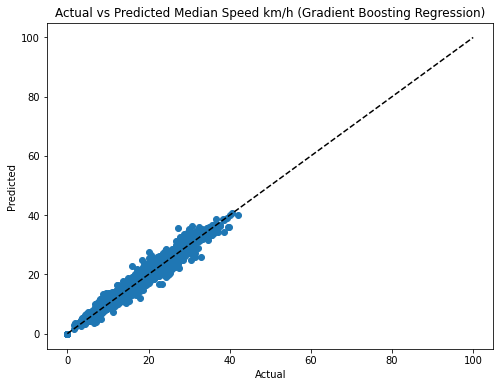

In [51]:
import matplotlib.pyplot as plt

# predict using the trained model
y_pred_gbreg = grid_gbreg.predict(X_test)

# plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gbreg)
plt.plot([0, 100], [0, 100], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Median Speed km/h (Gradient Boosting Regression)')
plt.show()

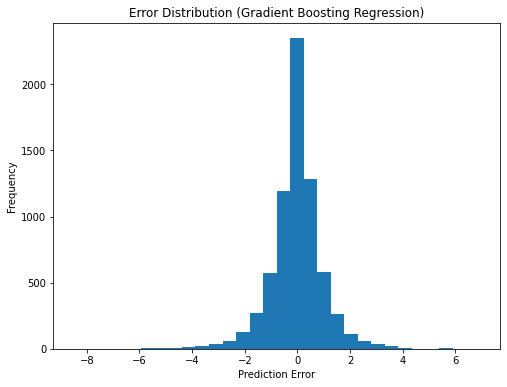

In [45]:
# plot error distribution
error = y_test - y_pred_gbreg
plt.figure(figsize=(8, 6))
plt.hist(error, bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Error Distribution (Gradient Boosting Regression)')
plt.show()

In [58]:
df_result = pd.DataFrame({'predicted': y_pred_gbreg, 'actual': y_test})

In [59]:
df_result.to_csv('result.csv', index=False)